#Recurrent Neural Networks Sentiment Classifier

###Use RNN to classify IMDB movie reviews by their sentiment.

###Load dependencies

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import SimpleRNN # new! 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


###Set hyperparameters

In [0]:
# output directory name:
output_dir = 'model_output/rnn'

# training:
epochs = 16 # way more!
batch_size = 128

# vector-space embedding: 
n_dim = 64 
n_unique_words = 10000 
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2 

# RNN layer architecture:
n_rnn = 256 
drop_rnn = 0.2

# dense layer architecture: 
# n_dense = 256
# dropout = 0.2

###Load data

In [0]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

###Preprocess data

In [0]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

###Design neural network architecture

In [0]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
# model.add(Dense(n_dense, activation='relu')) # typically don't see top dense layer in NLP like in 
# model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


###Configure model

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

###Train!

In [9]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 19s 755us/step - loss: 0.6810 - acc: 0.5436 - val_loss: 0.6468 - val_acc: 0.6002
Epoch 2/16
25000/25000 [==============================] - 18s 726us/step - loss: 0.6019 - acc: 0.6701 - val_loss: 0.6560 - val_acc: 0.5914
Epoch 3/16
 4736/25000 [====>.........................] - ETA: 12s - loss: 0.6280 - acc: 0.6218

25000/25000 [==============================] - 18s 725us/step - loss: 0.5710 - acc: 0.6928 - val_loss: 0.6214 - val_acc: 0.6426
Epoch 4/16
25000/25000 [==============================] - 18s 730us/step - loss: 0.4797 - acc: 0.7739 - val_loss: 0.4570 - val_acc: 0.7974
Epoch 5/16
15104/25000 [=================>............] - ETA: 5s - loss: 0.4697 - acc: 0.7781

25000/25000 [==============================] - 18s 730us/step - loss: 0.4540 - acc: 0.7907 - val_loss: 0.5011 - val_acc: 0.7575
Epoch 6/16
25000/25000 [==============================] - 18s 726us/step - loss: 0.4400 - acc: 0.8020 - val_loss: 0.4630 - val_acc: 0.7874
Epoch 7/16
17536/25000 [====================>.........] - ETA: 4s - loss: 0.3496 - acc: 0.8553

25000/25000 [==============================] - 18s 723us/step - loss: 0.3571 - acc: 0.8514 - val_loss: 0.4535 - val_acc: 0.8080
Epoch 8/16
25000/25000 [==============================] - 18s 722us/step - loss: 0.2952 - acc: 0.8822 - val_loss: 0.4709 - val_acc: 0.8195
Epoch 9/16
18176/25000 [====================>.........] - ETA: 4s - loss: 0.2620 - acc: 0.8985

25000/25000 [==============================] - 18s 727us/step - loss: 0.2669 - acc: 0.8953 - val_loss: 0.4506 - val_acc: 0.8066
Epoch 10/16
25000/25000 [==============================] - 18s 720us/step - loss: 0.2593 - acc: 0.9013 - val_loss: 0.5000 - val_acc: 0.8160
Epoch 11/16
18048/25000 [====================>.........] - ETA: 4s - loss: 0.2253 - acc: 0.9159

25000/25000 [==============================] - 18s 724us/step - loss: 0.2391 - acc: 0.9092 - val_loss: 0.4836 - val_acc: 0.8041
Epoch 12/16
25000/25000 [==============================] - 18s 721us/step - loss: 0.2147 - acc: 0.9202 - val_loss: 0.5485 - val_acc: 0.8123
Epoch 13/16
18048/25000 [====================>.........] - ETA: 4s - loss: 0.1920 - acc: 0.9302

25000/25000 [==============================] - 18s 721us/step - loss: 0.1942 - acc: 0.9291 - val_loss: 0.5264 - val_acc: 0.7773
Epoch 14/16
25000/25000 [==============================] - 18s 726us/step - loss: 0.1727 - acc: 0.9368 - val_loss: 0.5372 - val_acc: 0.8016
Epoch 15/16
18048/25000 [====================>.........] - ETA: 4s - loss: 0.1534 - acc: 0.9455

25000/25000 [==============================] - 18s 723us/step - loss: 0.1586 - acc: 0.9426 - val_loss: 0.5717 - val_acc: 0.7970
Epoch 16/16
25000/25000 [==============================] - 18s 723us/step - loss: 0.1589 - acc: 0.9430 - val_loss: 0.5992 - val_acc: 0.7997


###Evaluate

In [0]:
model.load_weights(output_dir+"/weights.07.hdf5") # zero-indexed # try 13, 14 etc.

In [0]:
y_hat = model.predict_proba(x_valid)

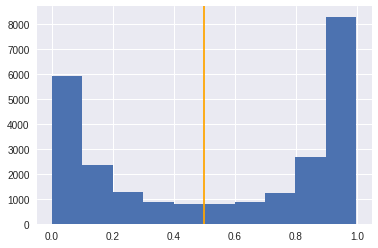

In [24]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [25]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'88.46'